In [1]:
import random
import math
import csv
import time
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,top_k_accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.calibration import CalibratedClassifierCV
from sklearn.multioutput import MultiOutputRegressor
from helper_func import prediction_plot,data_prep
from joblib import dump, load

In [2]:
numexpr=100000
noise=0.01
csv_path=f"./data/train_data{numexpr}_noise{noise}.csv"
df = pd.read_csv(csv_path,index_col=0)

In [3]:
#Data preparation step
df,X,y, X_train, X_test, y_train, y_test,scaled_X_train,scaled_X_test=data_prep(df)

In [4]:
SVM_REG= load('models/SVM_REGR.joblib')

In [5]:
#Calcualte predictions based on test data
start = time.time()
y_pred_fin=SVM_REG.predict(scaled_X_test)
end = time.time()
print('SVM predicting  taken ', end-start,' seconds')

SVM predicting  taken  278.6197407245636  seconds


In [6]:
#Display accuracy
# Evaluate the regressor
mse_one = mean_squared_error((y_test['mean']-1)/10, (y_pred_fin[:,0]-1)/10)
mse_two = mean_squared_error(y_test['sd']*4, y_pred_fin[:,1]*4)
print(f'MSE for first regressor: {mse_one} - second regressor: {mse_two}')
mae_one = mean_absolute_error((y_test['mean']-1)/10, (y_pred_fin[:,0]-1)/10)
mae_two = mean_absolute_error(y_test['sd']*4, y_pred_fin[:,1]*4)
print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')

MSE for first regressor: 0.00826375378752385 - second regressor: 0.07025024561178364
MAE for first regressor: 0.06928008851399664 - second regressor: 0.21953427807740872


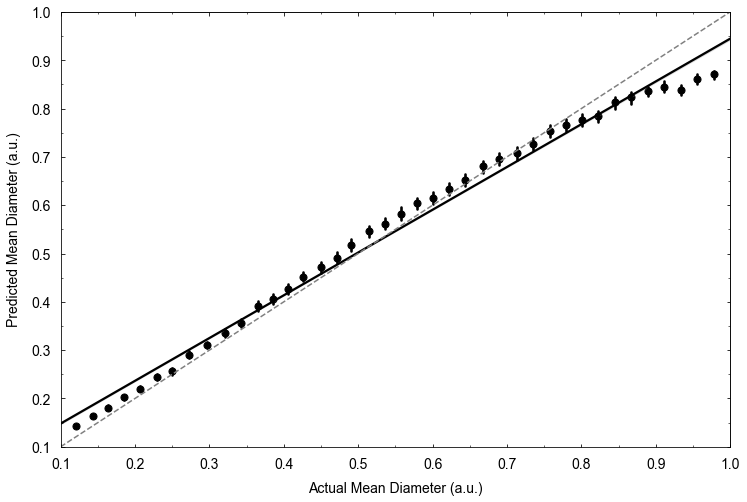

In [7]:
#Plot diameter prediction vs actual
prediction_plot(real_val=(y_test["mean"].values-1)/10,predic_val=(y_pred_fin[:,0]-1)/10,ax_lim_low=0.1,ax_lim_high=1,majr_tick=0.1,mnr_tick=0.05,ax_label='Mean Diameter')

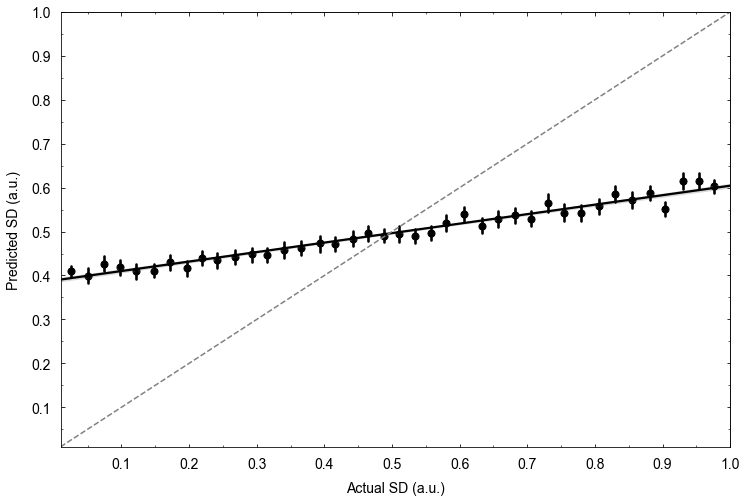

In [8]:
#Plot estiamted vs real standard deviations
prediction_plot(real_val=y_test["sd"].values*4,predic_val=y_pred_fin[:,1]*4,ax_lim_low=0.01,ax_lim_high=1,majr_tick=0.1,mnr_tick=0.05,ax_label='SD')